In [57]:
%matplotlib inline

from extract import extract

import numpy as np
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams.update({'font.size': 16})

In [58]:
# get data here
experiment_name = 'experiment_5'
rootpath = '../results'
time_key = 'finish'
data = extract(rootpath)

In [59]:
# the number of nodes that run worker is the key of the dict
max_worker_nodes = len(data[experiment_name].keys())

# !!has to be set manually!!
number_of_rounds = 5

# since we tested 1, 2, 3... nodes
X = np.arange(max_worker_nodes) + 1
# 
finished_all =[]
finished_mean = []
finished_min = []
finished_max = []
# 
#iterate over all worker_nodes
for experiment_number in range(1, max_worker_nodes+1):
    experiment_key = 'node-count-' + str(experiment_number)
    experiment = data[experiment_name][experiment_key]
    round_finished = []
    for round_number in range(0,number_of_rounds+1):
        round_key = 'round-'+ str(round_number)
        if round_key in experiment.keys():
            round = experiment[round_key]
            finished = int(round[time_key])
            round_finished.append(finished)

    finished_all.append(round_finished)
    min_elem = min(round_finished)
    max_elem = max(round_finished)
    finished_min.append(min_elem)
    finished_max.append(max_elem)
    if len(round_finished) >= 3:
        round_finished.remove(max_elem)
        round_finished.remove(min_elem)
    finished_mean.append(np.array(round_finished).mean())



In [60]:
def linear_scaling_plot(Y, save_to, x_min_max = None, y_min_max = None, title=None):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(X, Y, '-o', color='tab:blue')
    
    ax.set_xlabel("Number of workers")
    ax.set_ylabel("Time in seconds")
    ax.yaxis.grid()
    
    if x_min_max:
        ax.set_xlim(x_min_max)
    
    if y_min_max:
        ax.set_ylim(y_min_max)
    
    if title:
        ax.set_title(title)
    
    # display the plot
    plt.show()
    fig.savefig(save_to)

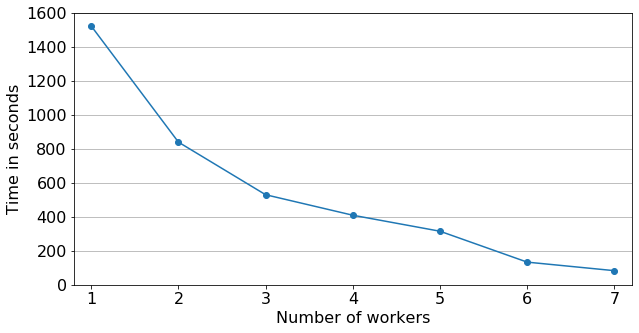

In [61]:
Y = np.array(finished_mean)/1000 # from ms -> s
linear_scaling_plot(Y, 'linear-scale-mean.pdf', x_min_max=(0.8,7.2), y_min_max=(0,1600))

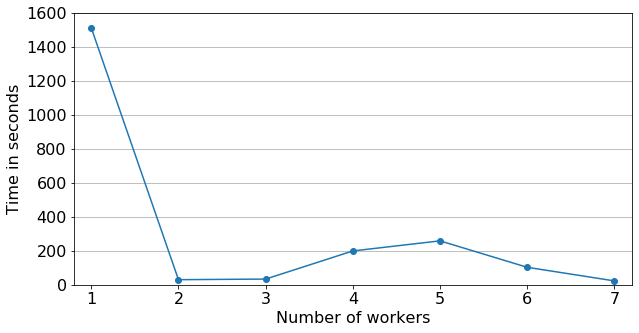

In [62]:
Y = np.array(finished_min)/1000 # from ms -> s
linear_scaling_plot(Y, 'linear-scale-min.pdf', x_min_max=(0.8,7.2), y_min_max=(0,1600))

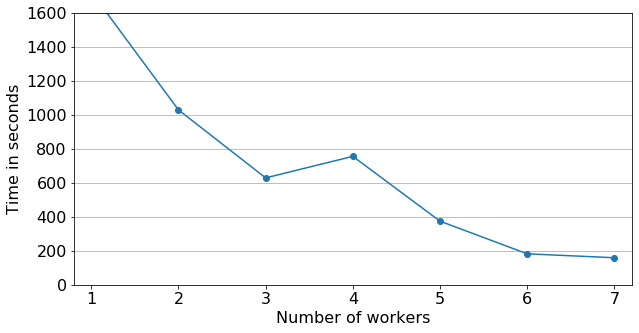

In [63]:
Y = np.array(finished_max)/1000 # from ms -> s
linear_scaling_plot(Y, 'linear-scale-max.pdf', x_min_max=(0.8,7.2), y_min_max=(0,1600))


In [64]:
number_of_nodes = len(data[experiment_name].keys())

mean_cpu_utilization = []

experiment = data[experiment_name]
for i in range(1,number_of_nodes+1):
    print(i)
    sub_experiment_name = 'node-count-' + str(i)
    sub_experiment = experiment[sub_experiment_name]
    
    round_values = []
    
    for round, round_data in sub_experiment.items():
        cpu_worker_list = round_data['cpu-worker']
        for cpu_utilization_single_worker in cpu_worker_list:
            round_values += cpu_utilization_single_worker
        
    mean = np.array(round_values).astype(float).mean()    
    mean_cpu_utilization.append(mean)
    
print(mean_cpu_utilization)
    

1
2
3
4
5
6
7
[1756.5866350165443, 1183.0044352617078, 1011.8813402385437, 707.1430836789461, 493.12972872538086, 276.56164383561645, 269.5873831775701]


In [65]:
def scale_and_utilize(Y1, Y2, save_to, x_min_max = None, y_min_max = None, title=None):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 1, 1)
    
    ax2 = ax1.twinx()
    
    ax1.plot(X, Y1, '-o', color='tab:blue')
    ax2.plot(X, Y2, '-o', color='tab:green')
    
    ax1.set_xlabel("Number of workers")
    ax1.set_ylabel("Time in seconds")
    ax1.yaxis.grid()
    
    if x_min_max:
        ax1.set_xlim(x_min_max)
    
    if y_min_max:
        ax1.set_ylim(y_min_max)
    
    if title:
        ax1.set_title(title)
    
    # display the plot
    plt.show()
    fig.savefig(save_to)
    

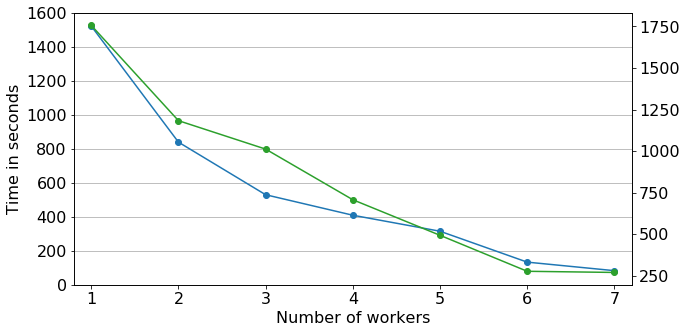

In [66]:
# plot MEAN data
Y = np.array(finished_mean)/1000 # from ms -> s
scale_and_utilize(Y, mean_cpu_utilization, 'linear-scale-mean.pdf', x_min_max=(0.8,7.2), y_min_max=(0,1600))

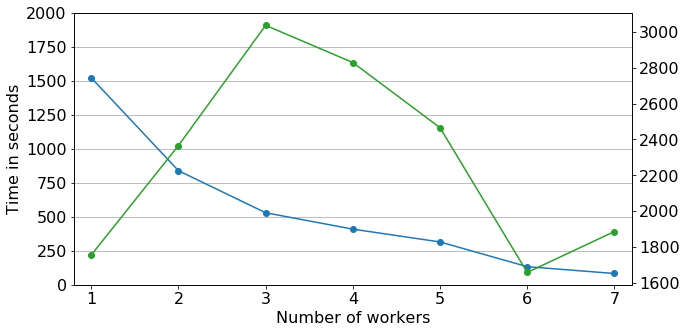

In [67]:
a = [1,2,3,4,5,6,7]

m_mean_cpu_utilization = np.multiply(mean_cpu_utilization, a)
scale_and_utilize(Y, m_mean_cpu_utilization, 'linear-scale-mean.pdf', x_min_max=(0.8,7.2), y_min_max=(0,2000))



